
# <span style="color:rgb(213,80,0)">Windsor House Price data.</span>

This file creates Figures 8.1\-8.7.

## Beginning of code

In [1]:
prin=0;

load hprice.txt;

% setup parameters
n=size(hprice,1);
y=hprice(:,1);
X=hprice(:,2:5);

bayes=struct;
n0=5;
bayes.n0=n0;

% set \beta components
beta0=zeros(5,1);
beta0(2,1)=10;
beta0(3,1)=5000;
beta0(4,1)=10000;
beta0(5,1)=10000;
bayes.beta0=beta0;

% \tau
s02=1/4.0e-8;
tau0=1/s02;
bayes.tau0=tau0;

% R prior settings
R=2.4*eye(5);
R(2,2)=6e-7;
R(3,3)=.15;
R(4,4)=.6;
R(5,5)=.6;
R=inv(R);
bayes.R=R;

## Create Figures 8.1 and 8.4

In [2]:
outBA=FSRB(y,X,'bayes',bayes', 'plots',1,'xlim',[280 n]);

Observed curve of r_min is at least 10 times greater than 99.99% envelope
--------------------------------------------------
-------------------------
Signal detection loop
Tentative signal in central part of the search: step m=511 because
rmin(511,546)>99.99% and rmin(510,546)>99.99% and rmin(512,546)>99.99%
rmin(511,546)>99.999%
-------------------
Signal validation exceedance of upper envelopes
Validated signal
-------------------------------
Start resuperimposing envelopes from step m=510
Superimposition stopped because r_{min}(512,529)>99.9% envelope
Subsample of 528 units is homogeneous
----------------------------
Final output
Number of units declared as outliers=18
Summary of the exceedances
           1          99         999        9999       99999
          10          64          48          38          29


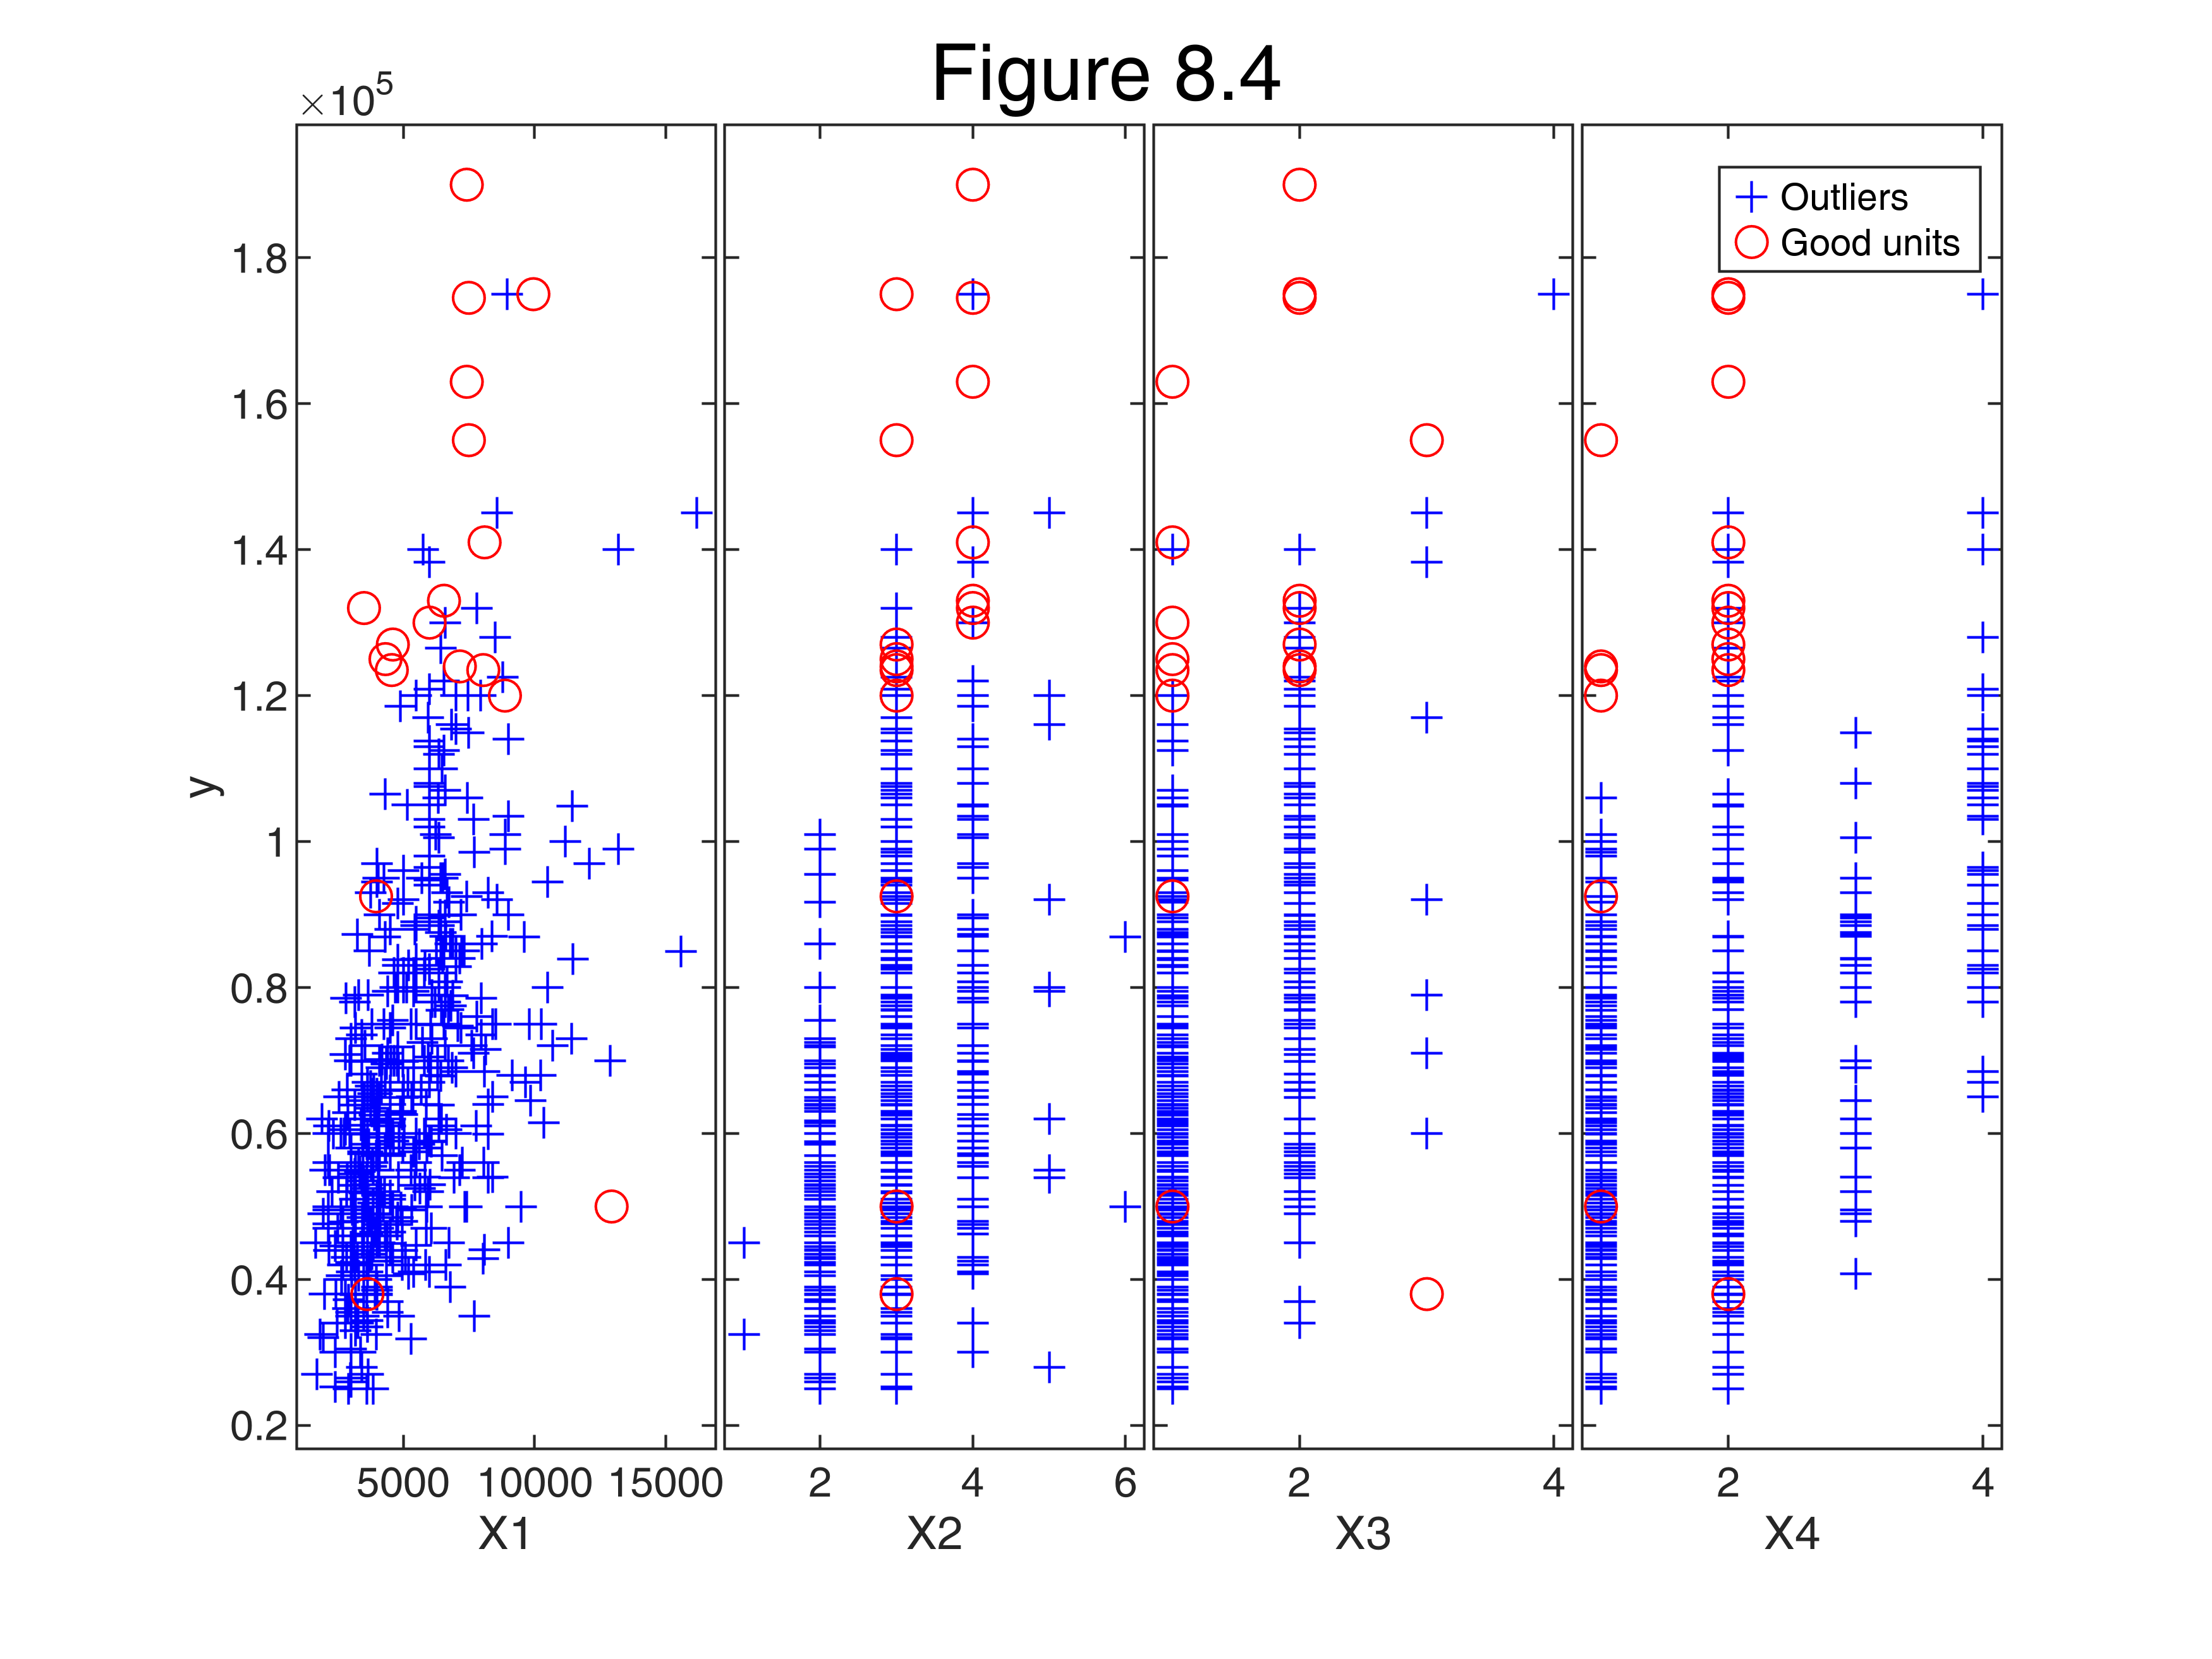

In [3]:
dout=n-length(outBA.ListOut);

fig=findobj(0,'tag','fsr_yXplot');
figure(fig(1))
set(gcf,'Tag','fsr_yXplot81')

if prin ==1
    print -depsc h4.eps;
else
    set(gcf,'Name', 'Figure 8.4');
    sgtitle('Figure 8.4')
end


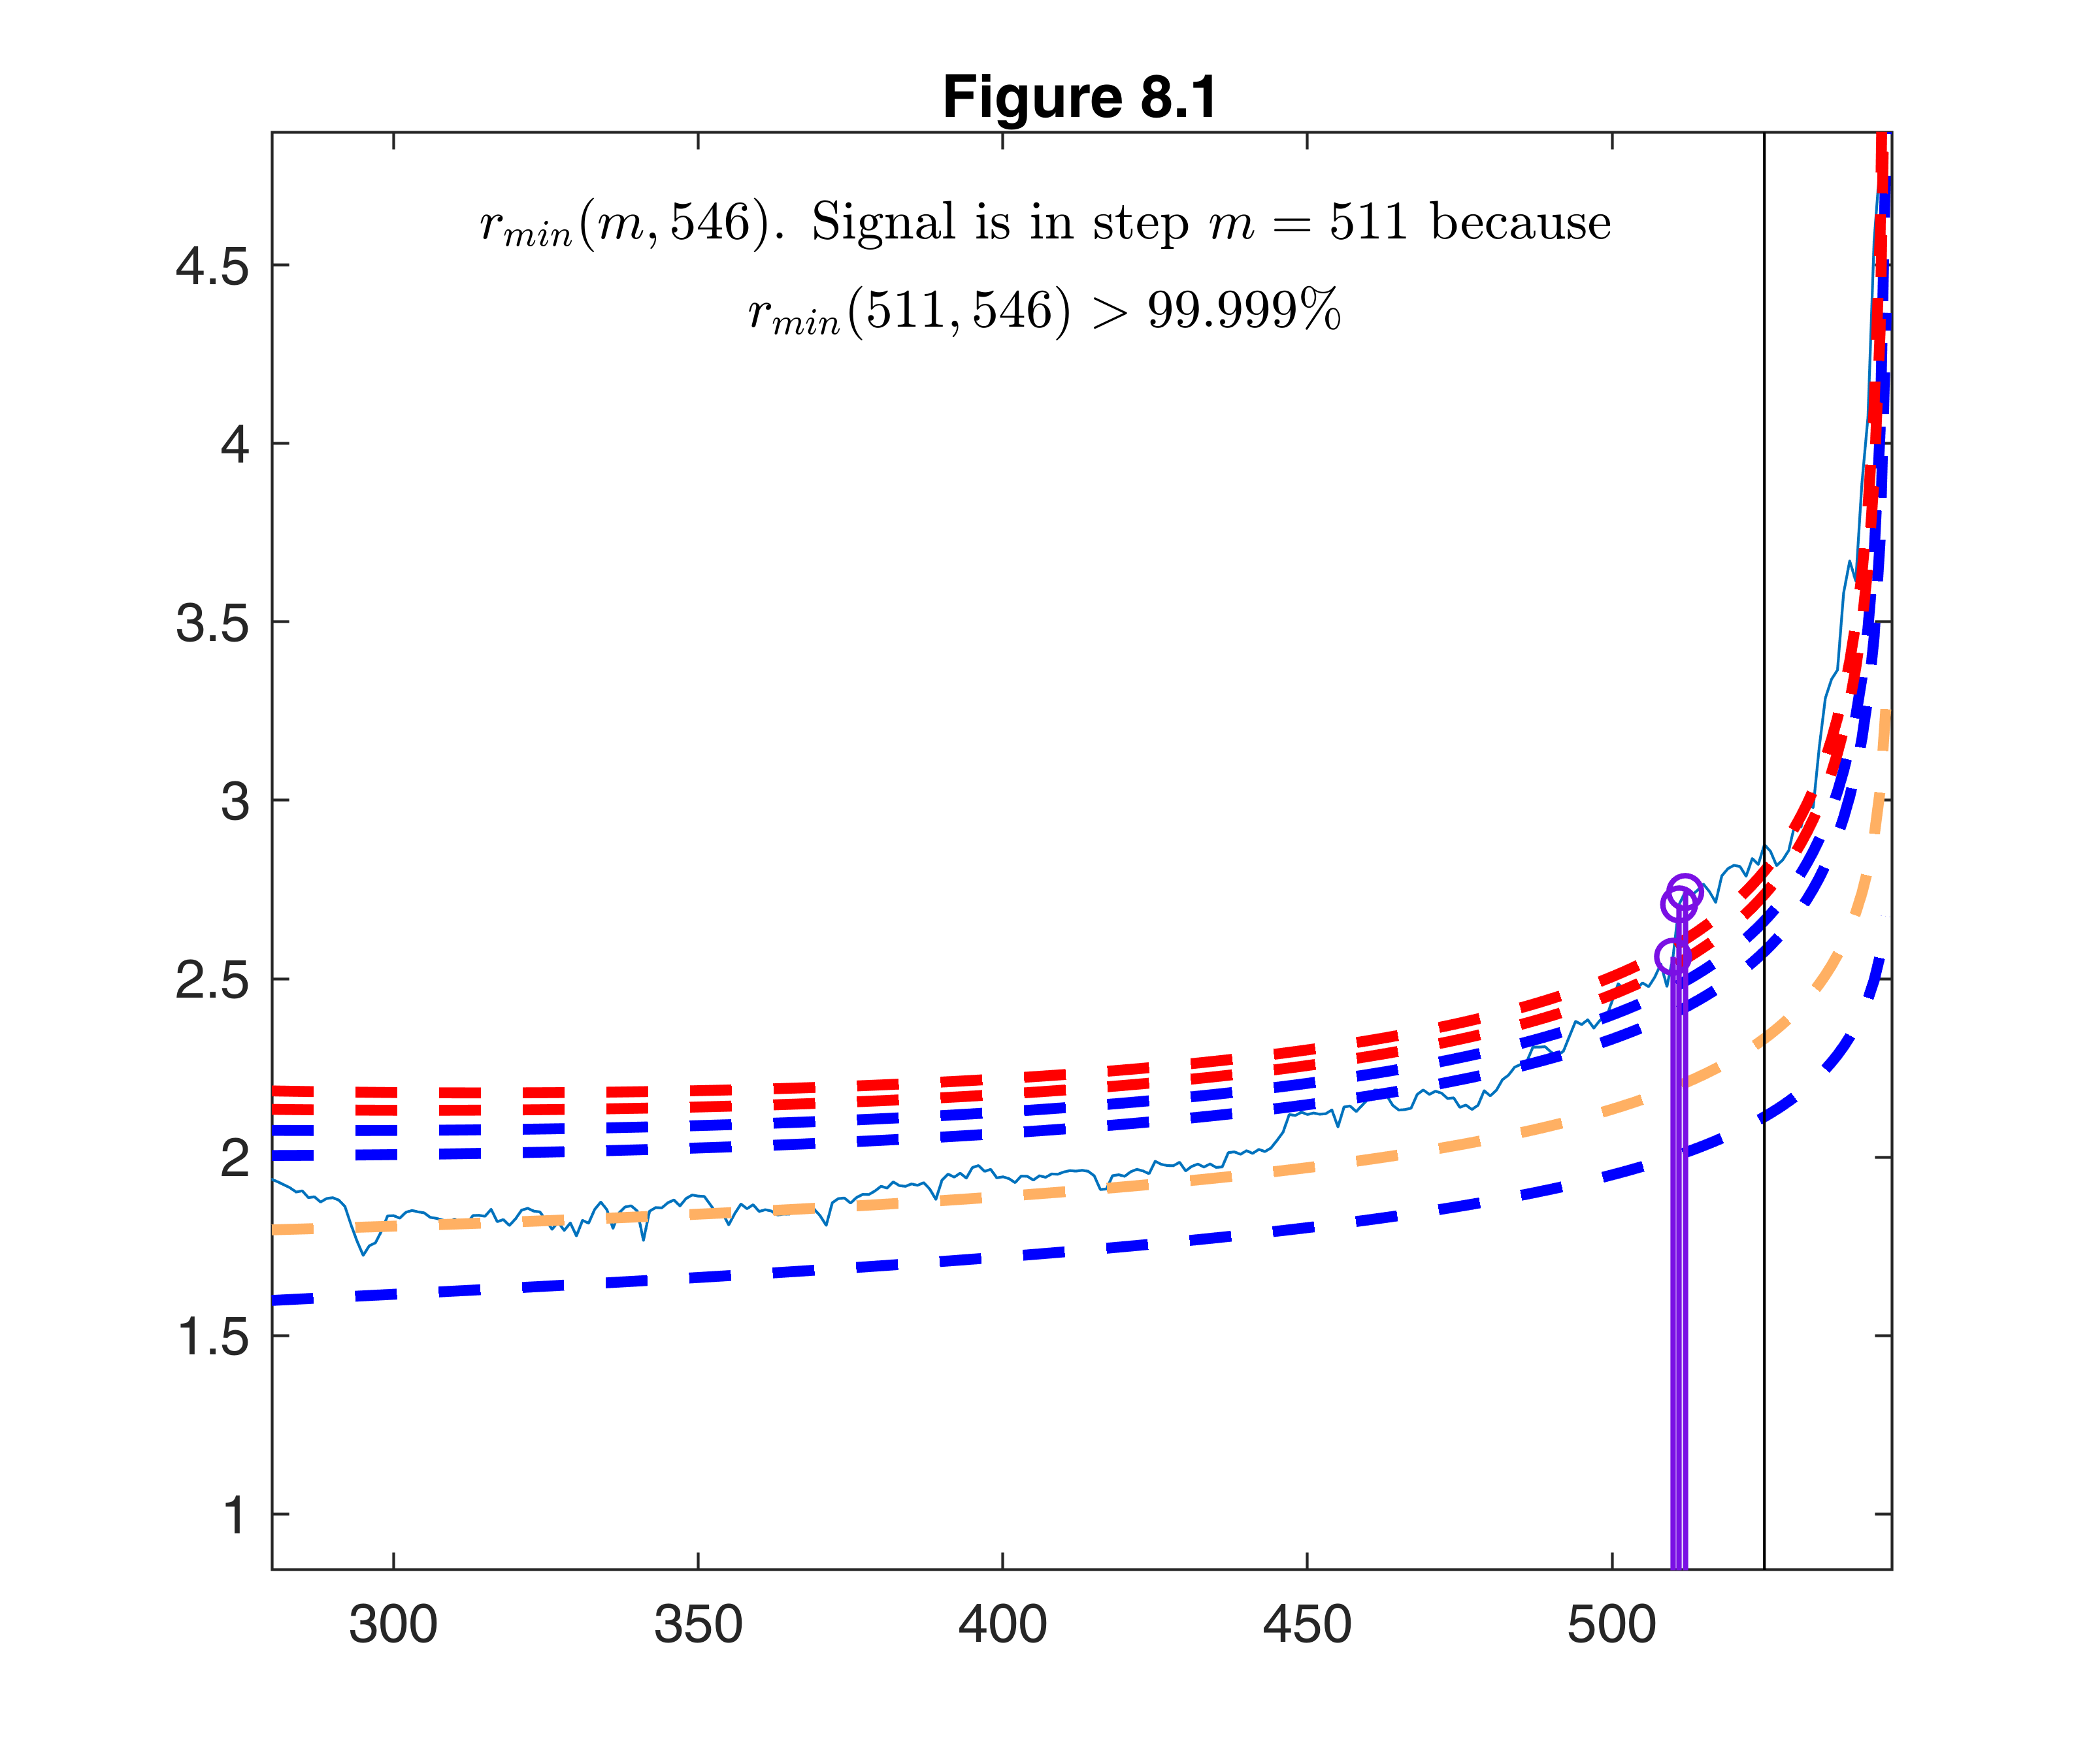

In [4]:

fig=findobj(0,'tag','pl_fsr');
figure(fig(1))
if prin ==1
    print -depsc h1.eps;
else
    set(gcf,'Name', 'Figure 8.1');
    title('Figure 8.1')
end

## Create Figure 8.2

init = initial point to start monitoring


In [5]:
init=20;
xlimL=init; % lower value of xlim
xlimU=125;  % upper value of xlim

outBAeda=FSRBeda(y,X,'bayes',bayes,'init',init, 'conflev', [0.95 0.99]);

m=100
m=200
m=300
m=400
m=500


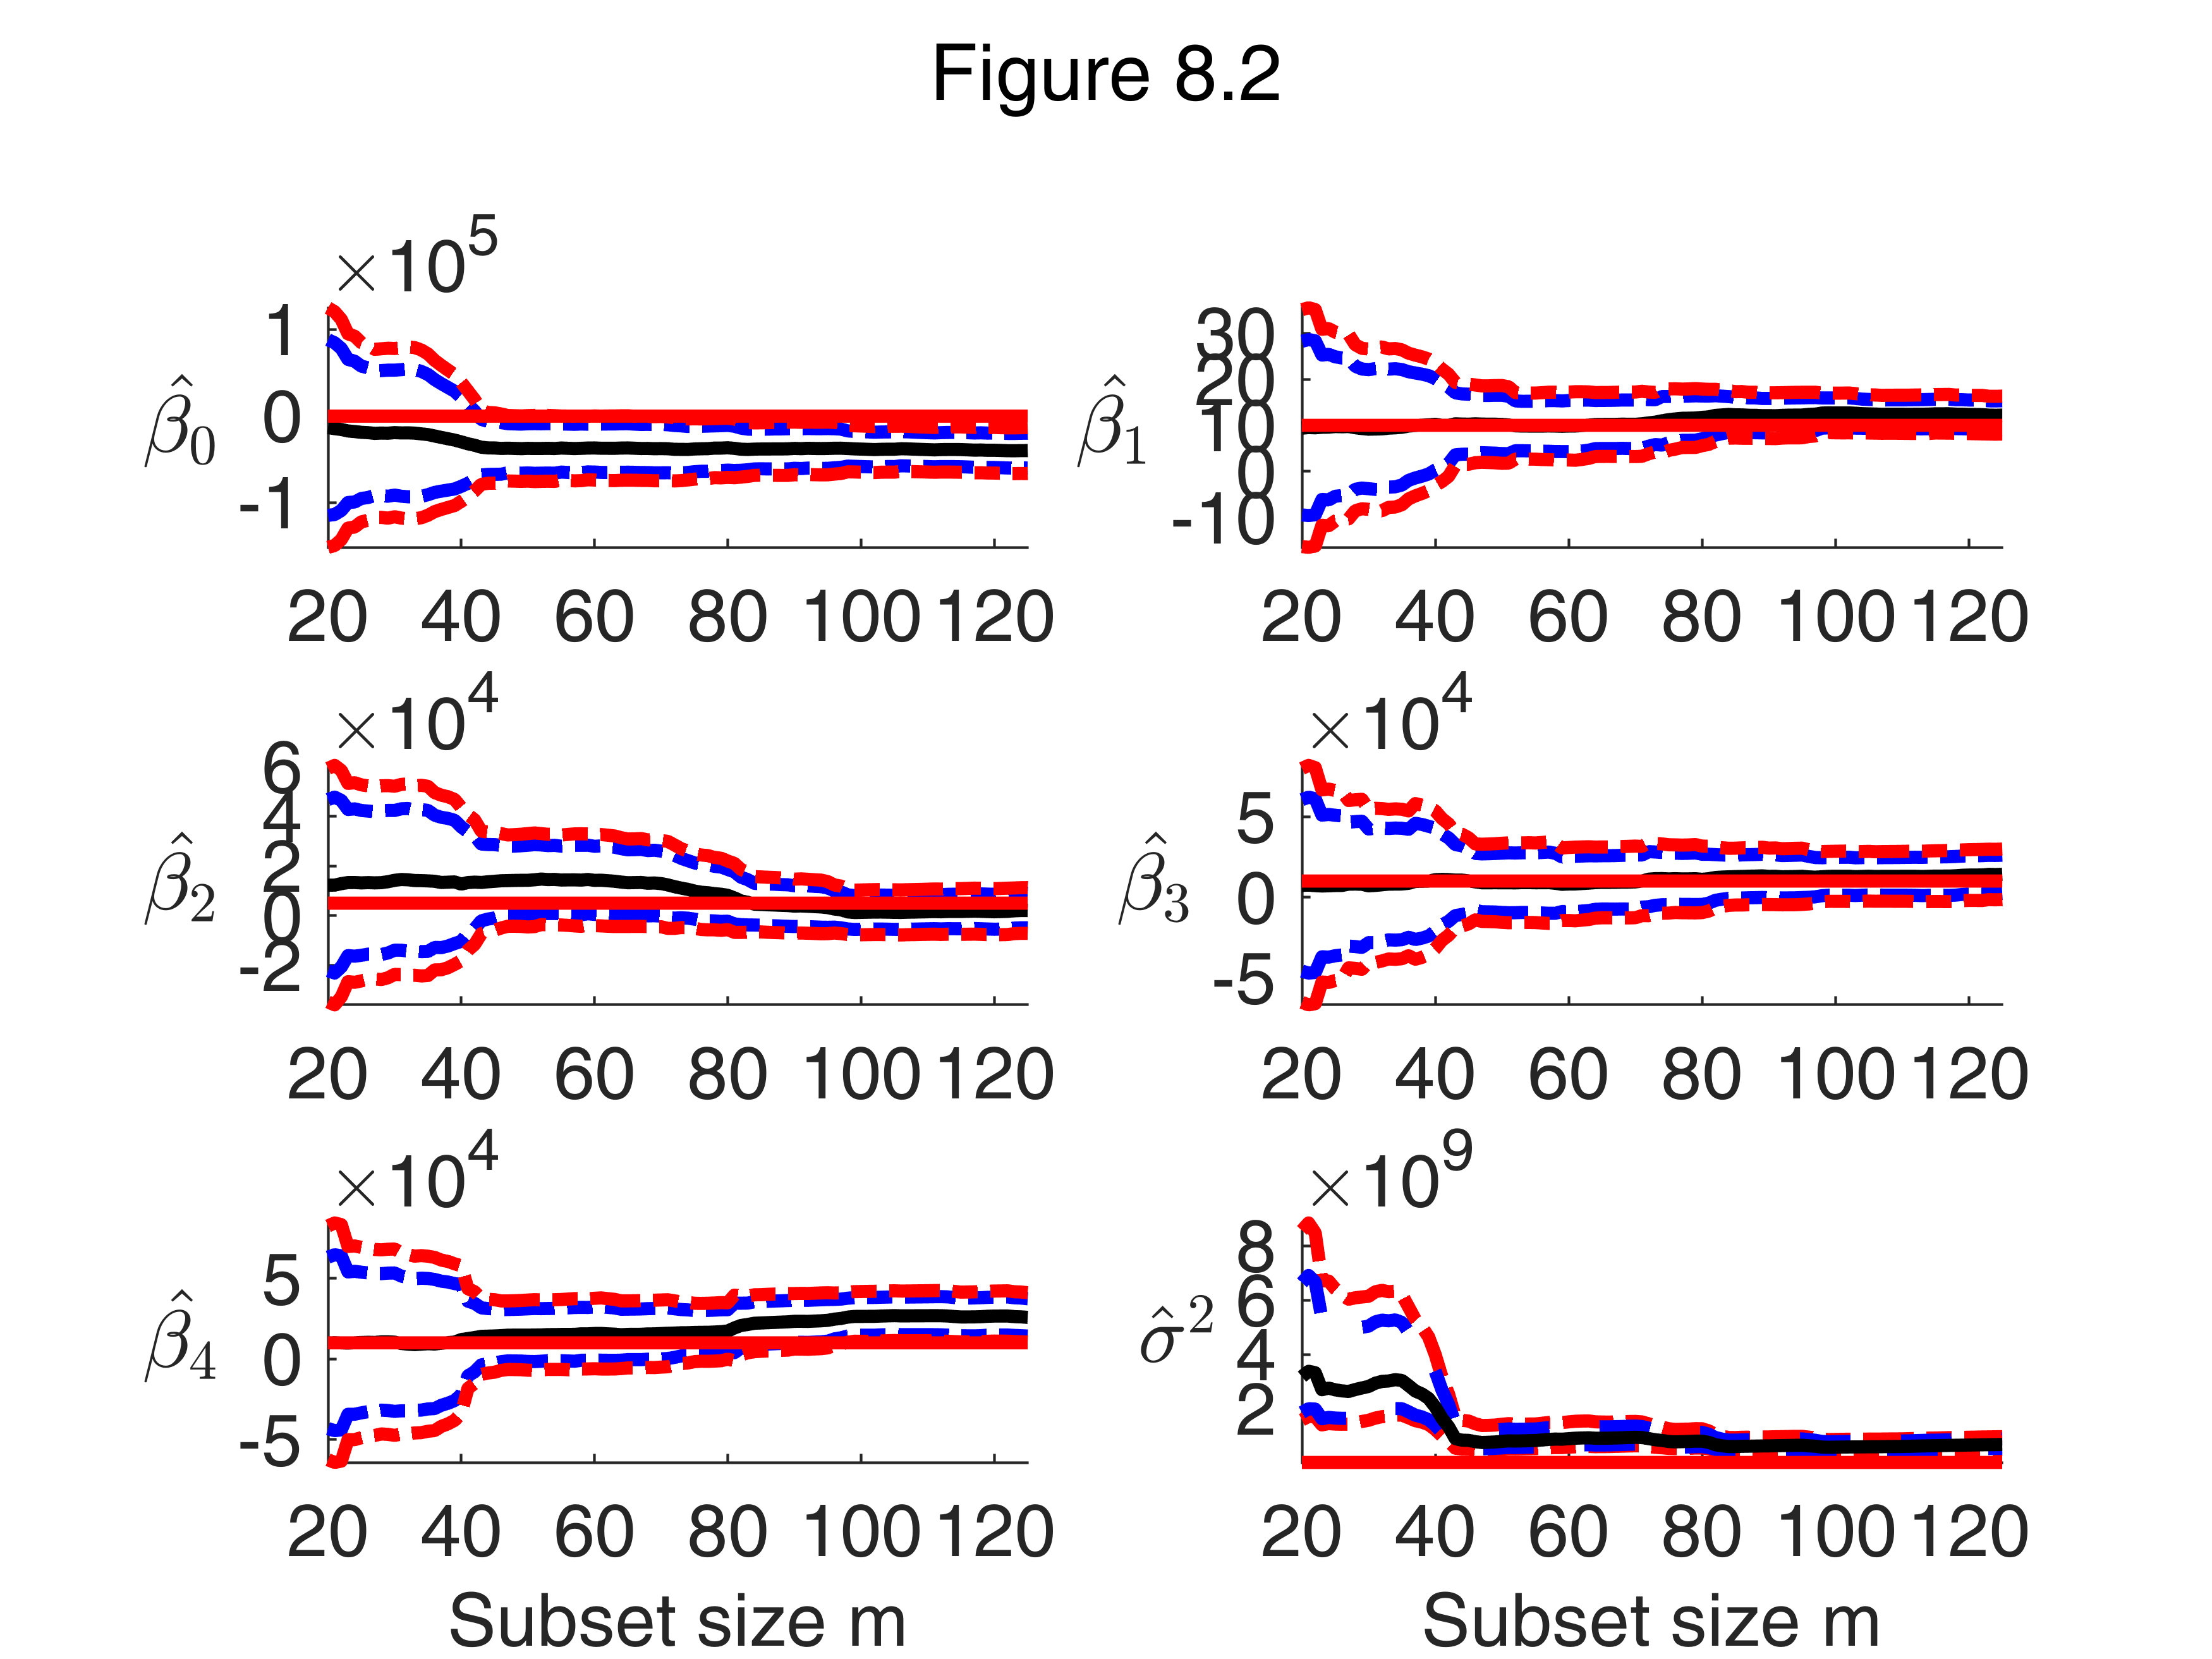

In [6]:

% Set font size, line width and line style
figure;
lwd=2.5;
FontSize=14;
linst={'-','--',':','-.','--',':'};

for j=1:5
    my_subplot=subplot(3,2,j);
    hold('on')
    % plot 95% and 99% HPD  trajectories
    plot(outBAeda.beta1(:,1),outBAeda.beta1HPD(:,1:2,j),'LineStyle',linst{4},'LineWidth',lwd,'Color','b')
    plot(outBAeda.beta1(:,1),outBAeda.beta1HPD(:,3:4,j),'LineStyle',linst{4},'LineWidth',lwd,'Color','r')

    % plot posterior estimate of beta1_j
    plot(outBAeda.beta1(:,1),outBAeda.beta1(:,j+1)','LineStyle',linst{1},'LineWidth',lwd,'Color','k')

    % Add the horizontal line which corresponds to prior values
    xL = get(my_subplot,'XLim');
    line(xL,[beta0(j) beta0(j)],'Color','r','LineWidth',lwd);

    % Set ylim
    ylimU=max([outBAeda.beta1HPD(:,4,j); beta0(j)]);
    ylimL=min([outBAeda.beta1HPD(:,3,j); beta0(j)]);
    ylim([ylimL ylimU])

    % Add vertical line in correspondence of the step prior to the
    % entry of the first outlier
    line([dout; dout],[ylimL; ylimU],'Color','r','LineWidth',lwd);

    % Set xlim
    xlim([xlimL xlimU]);

    ylabel([' !!!EQ_1!!! '],'Interpreter','LaTeX','FontSize',20,'rot',-360);
    set(gca,'FontSize',FontSize);
    if j>4
        xlabel('Subset size m','FontSize',FontSize);
    end
end

% Subplot associated with the monitoring of sigma^2
subplot(3,2,6);
%figure()
hold('on')
% 99%
plot(outBAeda.sigma21HPD(:,1),outBAeda.sigma21HPD(:,4:5),'LineStyle',linst{4},'LineWidth',lwd,'Color','r')
% 95%
plot(outBAeda.sigma21HPD(:,1),outBAeda.sigma21HPD(:,2:3),'LineStyle',linst{2},'LineWidth',lwd,'Color','b')
% Plot 1\/tau1
plot(outBAeda.S21(:,1),1./outBAeda.S21(:,3),'LineWidth',lwd,'Color','k')
ylabel(' !!!EQ_2!!! ','Interpreter','LaTeX','FontSize',20,'rot',-360);
set(gca,'FontSize',FontSize);

% Set ylim
ylimU=max([outBAeda.sigma21HPD(:,5); s02]);
ylimL=min([outBAeda.sigma21HPD(:,4); s02]);
ylim([ylimL ylimU])

% Set xlim
xlim([xlimL xlimU]);
xL = get(my_subplot,'XLim');

% Add the horizontal line which corresponds to prior value of  !!!EQ_3!!!
line(xL,[s02 s02],'Color','r','LineWidth',lwd);

% Add vertical line in correspondence of the step prior to the
% entry of the first outlier
line([dout; dout],[ylimL; ylimU],'Color','r','LineWidth',lwd);
xlabel('Subset size m','FontSize',FontSize);

if prin==1
    % print to postscript
    print -depsc h2.eps;
else
    set(gcf,'Name', 'Figure 8.2');
    sgtitle('Figure 8.2')
end

## Create Figure 8.3

In [7]:
% init = initial point to start monitoring
init=250;
xlimL=init; % lower value of xlim
xlimU=n+1;  % upper value of xlim

outBAeda=FSRBeda(y,X,'bayes',bayes,'init',init, 'conflev', [0.95 0.99]);

m=100
m=200
m=300
m=400
m=500


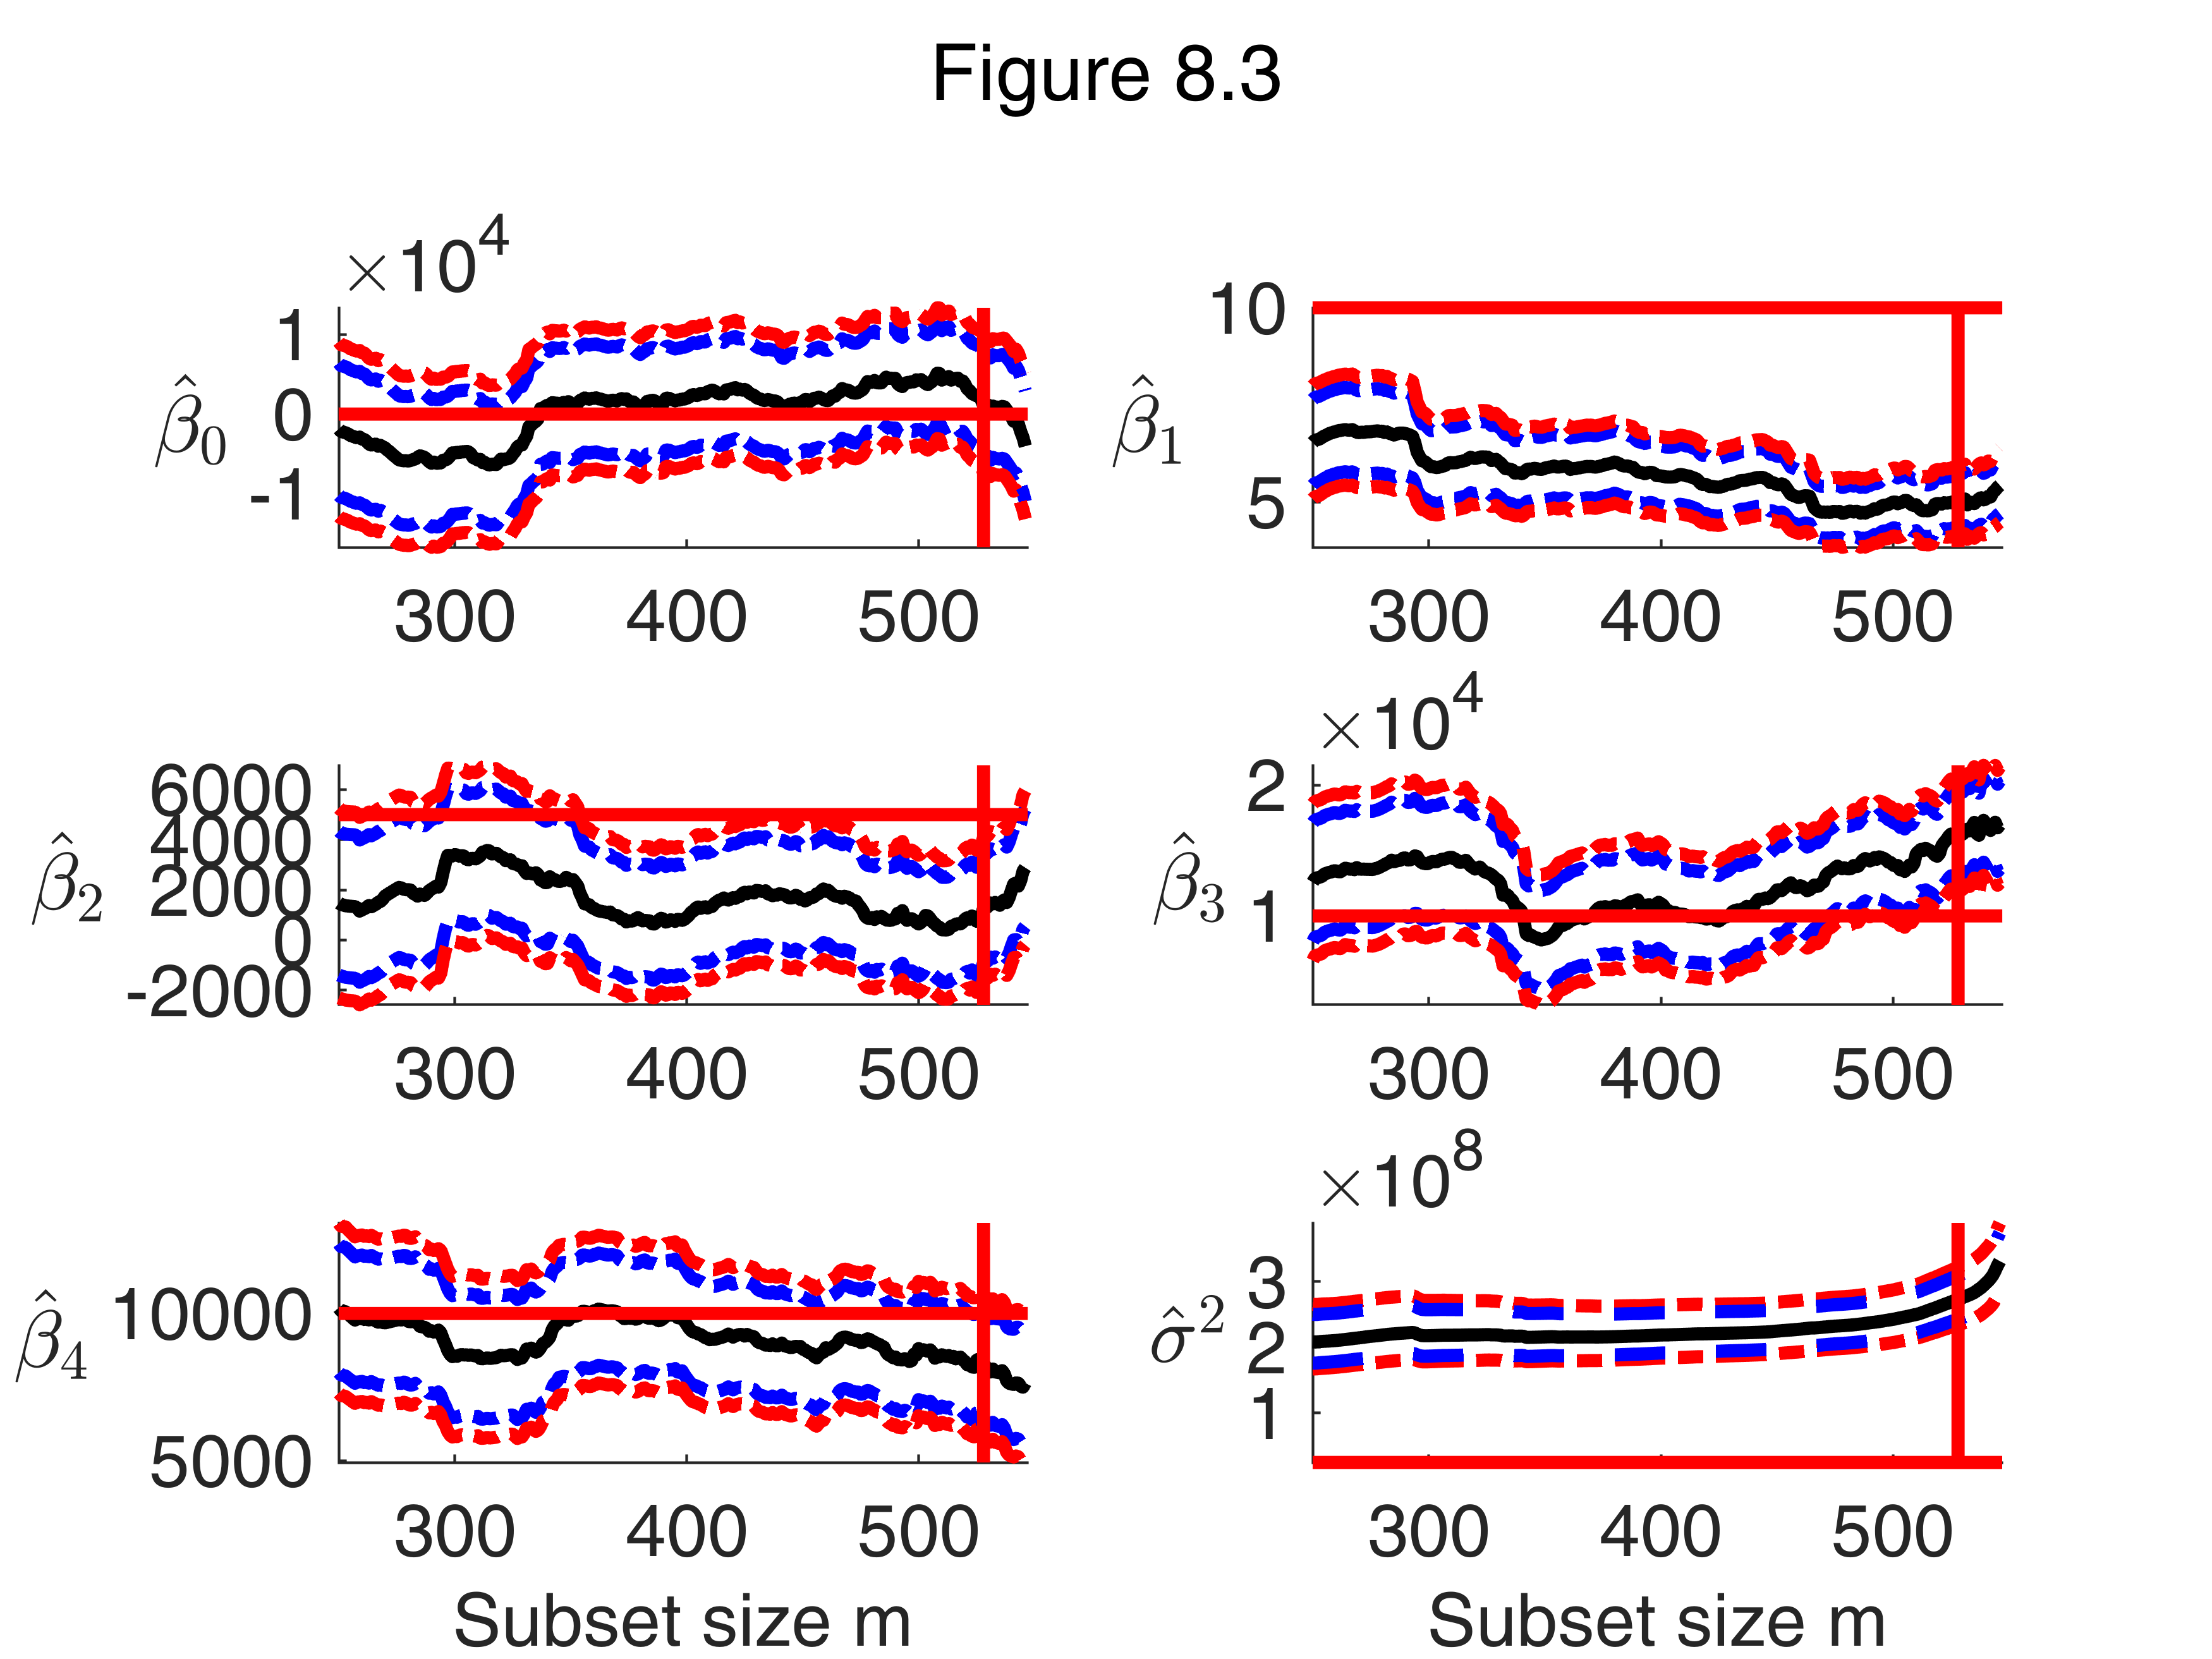

In [8]:
figure;
for j=1:5
    my_subplot=subplot(3,2,j);
    hold('on')
    % plot 95% and 99% HPD  trajectories
    plot(outBAeda.beta1(:,1),outBAeda.beta1HPD(:,1:2,j),'LineStyle',linst{4},'LineWidth',lwd,'Color','b')
    plot(outBAeda.beta1(:,1),outBAeda.beta1HPD(:,3:4,j),'LineStyle',linst{4},'LineWidth',lwd,'Color','r')

    % plot posterior estimate of beta1_j
    plot(outBAeda.beta1(:,1),outBAeda.beta1(:,j+1)','LineStyle',linst{1},'LineWidth',lwd,'Color','k')

    % Add the horizontal line which corresponds to prior values
    xL = get(my_subplot,'XLim');
    line(xL,[beta0(j) beta0(j)],'Color','r','LineWidth',lwd);

    % Set ylim
    ylimU=max([outBAeda.beta1HPD(:,4,j); beta0(j)]);
    ylimL=min([outBAeda.beta1HPD(:,3,j); beta0(j)]);
    ylim([ylimL ylimU])

    % Set xlim
    xlim([xlimL xlimU]);

    % Add vertical line in correspondence of the step prior to the
    % entry of the first outlier
    line([dout; dout],[ylimL; ylimU],'Color','r','LineWidth',lwd);

    ylabel([' !!!EQ_4!!! '],'Interpreter','LaTeX','FontSize',20,'rot',-360);
    set(gca,'FontSize',FontSize);
    if j>4
        xlabel('Subset size m','FontSize',FontSize);
    end
end

% Subplot associated with the monitoring of sigma^2
subplot(3,2,6);
%figure()
hold('on')
% 99%
plot(outBAeda.sigma21HPD(:,1),outBAeda.sigma21HPD(:,4:5),'LineStyle',linst{4},'LineWidth',lwd,'Color','r')
% 95%
plot(outBAeda.sigma21HPD(:,1),outBAeda.sigma21HPD(:,2:3),'LineStyle',linst{2},'LineWidth',lwd,'Color','b')
% Plot 1/tau1
plot(outBAeda.S21(:,1),1./outBAeda.S21(:,3),'LineWidth',lwd,'Color','k')
ylabel(' !!!EQ_2!!! ','Interpreter','LaTeX','FontSize',20,'rot',-360);
set(gca,'FontSize',FontSize);

% Set ylim
ylimU=max([outBAeda.sigma21HPD(:,5); s02]);
ylimL=min([outBAeda.sigma21HPD(:,4); s02]);
ylim([ylimL ylimU])

% Set xlim
xlim([xlimL xlimU]);
xL = get(my_subplot,'XLim');

% Add the horizontal line which corresponds to prior value of  !!!EQ_3!!!
line(xL,[s02 s02],'Color','r','LineWidth',lwd);

% Add vertical line in correspondence of the step prior to the
% entry of the first outlier
line([dout; dout],[ylimL; ylimU],'Color','r','LineWidth',lwd);
xlabel('Subset size m','FontSize',FontSize);
if prin ==1
    print -depsc h3.eps
else
    set(gcf,'Name', 'Figure 8.3');
    sgtitle('Figure 8.3')
end

In [9]:

drawnow

## Create Figure 8.5 (frequentist analysis)

Monitoring of 95 per cent and 99 per cent confidence intervals of beta and sigma2 init = point to start monitoring diagnostics along the FS


In [10]:
init=80;
[outLXS]=LXS(y,X,'nsamp',50000);

Total estimated time to complete LMS:  0.91 seconds 
------------------------------

In [11]:
outEDA=FSReda(y,X,outLXS.bs,'conflev',[0.95 0.99],'init',init);

m=100
m=200
m=300
m=400
m=500

In [12]:
p=size(X,2)+1;
% Set font size, line width and line style
figure;
lwd=2.5;
FontSize=14;
linst={'-','--',':','-.','--',':'};
nr=3;
nc=2;
xlimL=init; % lower value fo xlim
xlimU=n+1;  % upper value of xlim
for j=1:p
    subplot(nr,nc,j);
    hold('on')
    % plot 95% and 99% HPD  trajectories
    plot(outEDA.Bols(:,1),outEDA.betaINT(:,1:2,j),'LineStyle',linst{4},'LineWidth',lwd,'Color','b')
    plot(outEDA.Bols(:,1),outEDA.betaINT(:,3:4,j),'LineStyle',linst{4},'LineWidth',lwd,'Color','r')

    % plot estimate of beta1_j
    plot(outEDA.Bols(:,1),outEDA.Bols(:,j+1)','LineStyle',linst{1},'LineWidth',lwd,'Color','k')

    % Set ylim
    ylimU=max(outEDA.betaINT(:,4,j));
    ylimL=min(outEDA.betaINT(:,3,j));
    ylim([ylimL ylimU])

    % Set xlim
    xlim([xlimL xlimU]);

    % Add vertical line in correspondence of the step prior to the
    % entry of the first outlier
    line([dout; dout],[ylimL; ylimU],'Color','r','LineWidth',lwd);

    ylabel([' !!!EQ_1!!! '],'Interpreter','LaTeX','FontSize',20,'rot',-360);
    set(gca,'FontSize',FontSize);
    if j>(nr-1)*nc
        xlabel('Subset size m','FontSize',FontSize);
    end
end

% Subplot associated with the monitoring of sigma^2
subplot(nr,nc,6);
hold('on')
% 99%
plot(outEDA.sigma2INT(:,1),outEDA.sigma2INT(:,4:5),'LineStyle',linst{4},'LineWidth',lwd,'Color','r')
% 95%
plot(outEDA.sigma2INT(:,1),outEDA.sigma2INT(:,2:3),'LineStyle',linst{2},'LineWidth',lwd,'Color','b')
% Plot rescaled S2
plot(outEDA.S2(:,1),outEDA.S2(:,4),'LineWidth',lwd,'Color','k')
ylabel(' !!!EQ_2!!! ','Interpreter','LaTeX','FontSize',20,'rot',-360);
set(gca,'FontSize',FontSize);

% Set ylim
ylimU=max(outEDA.sigma2INT(:,5));
ylimL=min(outEDA.sigma2INT(:,4));
ylim([ylimL ylimU])
% Set xlim
xlim([xlimL xlimU]);

% Add vertical line in correspondence of the step prior to the
% entry of the first outlier
line([dout; dout],[ylimL; ylimU],'Color','r','LineWidth',lwd);
xlabel('Subset size m','FontSize',FontSize);

% Add multiple title
disp(['The vertical lines are located in the' ...
    ' step prior to the inclusion of the first outlier'])

The vertical lines are located in the step prior to the inclusion of the first outlier


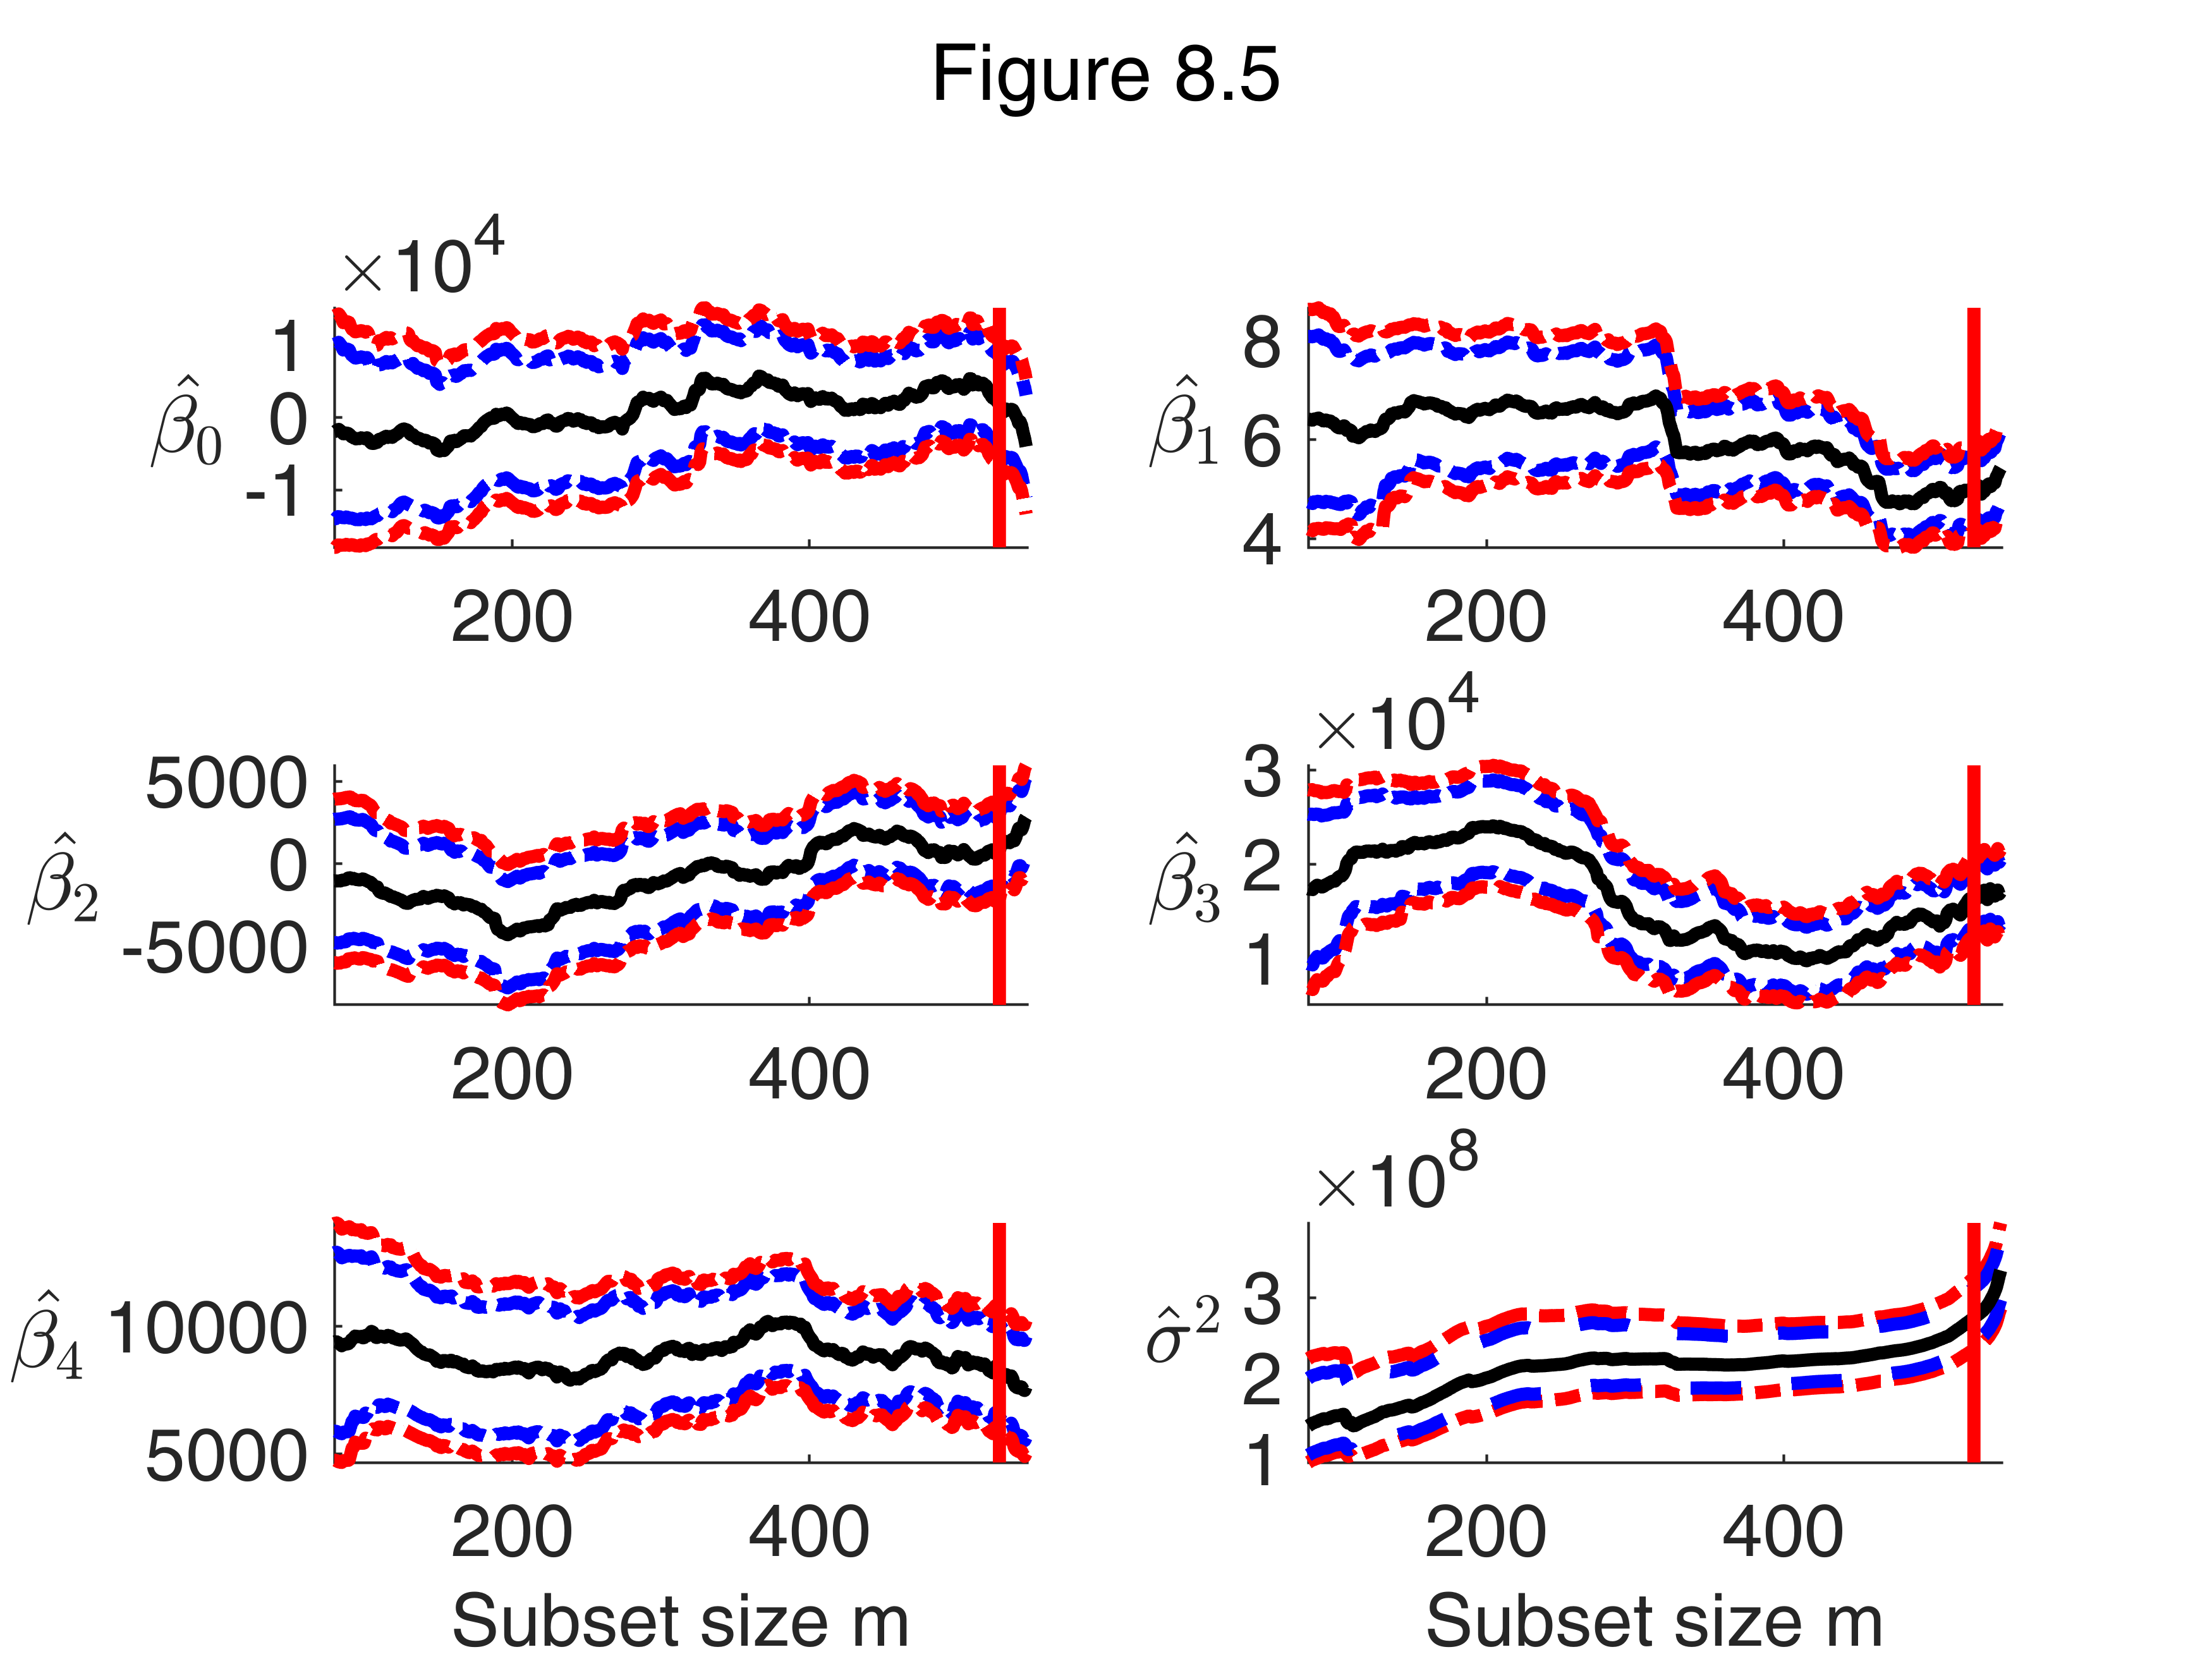

In [13]:
if prin ==1
    print -depsc h5.eps
else
    set(gcf,'Name', 'Figure 8.5');
    sgtitle('Figure 8.5')
end

In [14]:

drawnow

## Create Figure 8.6


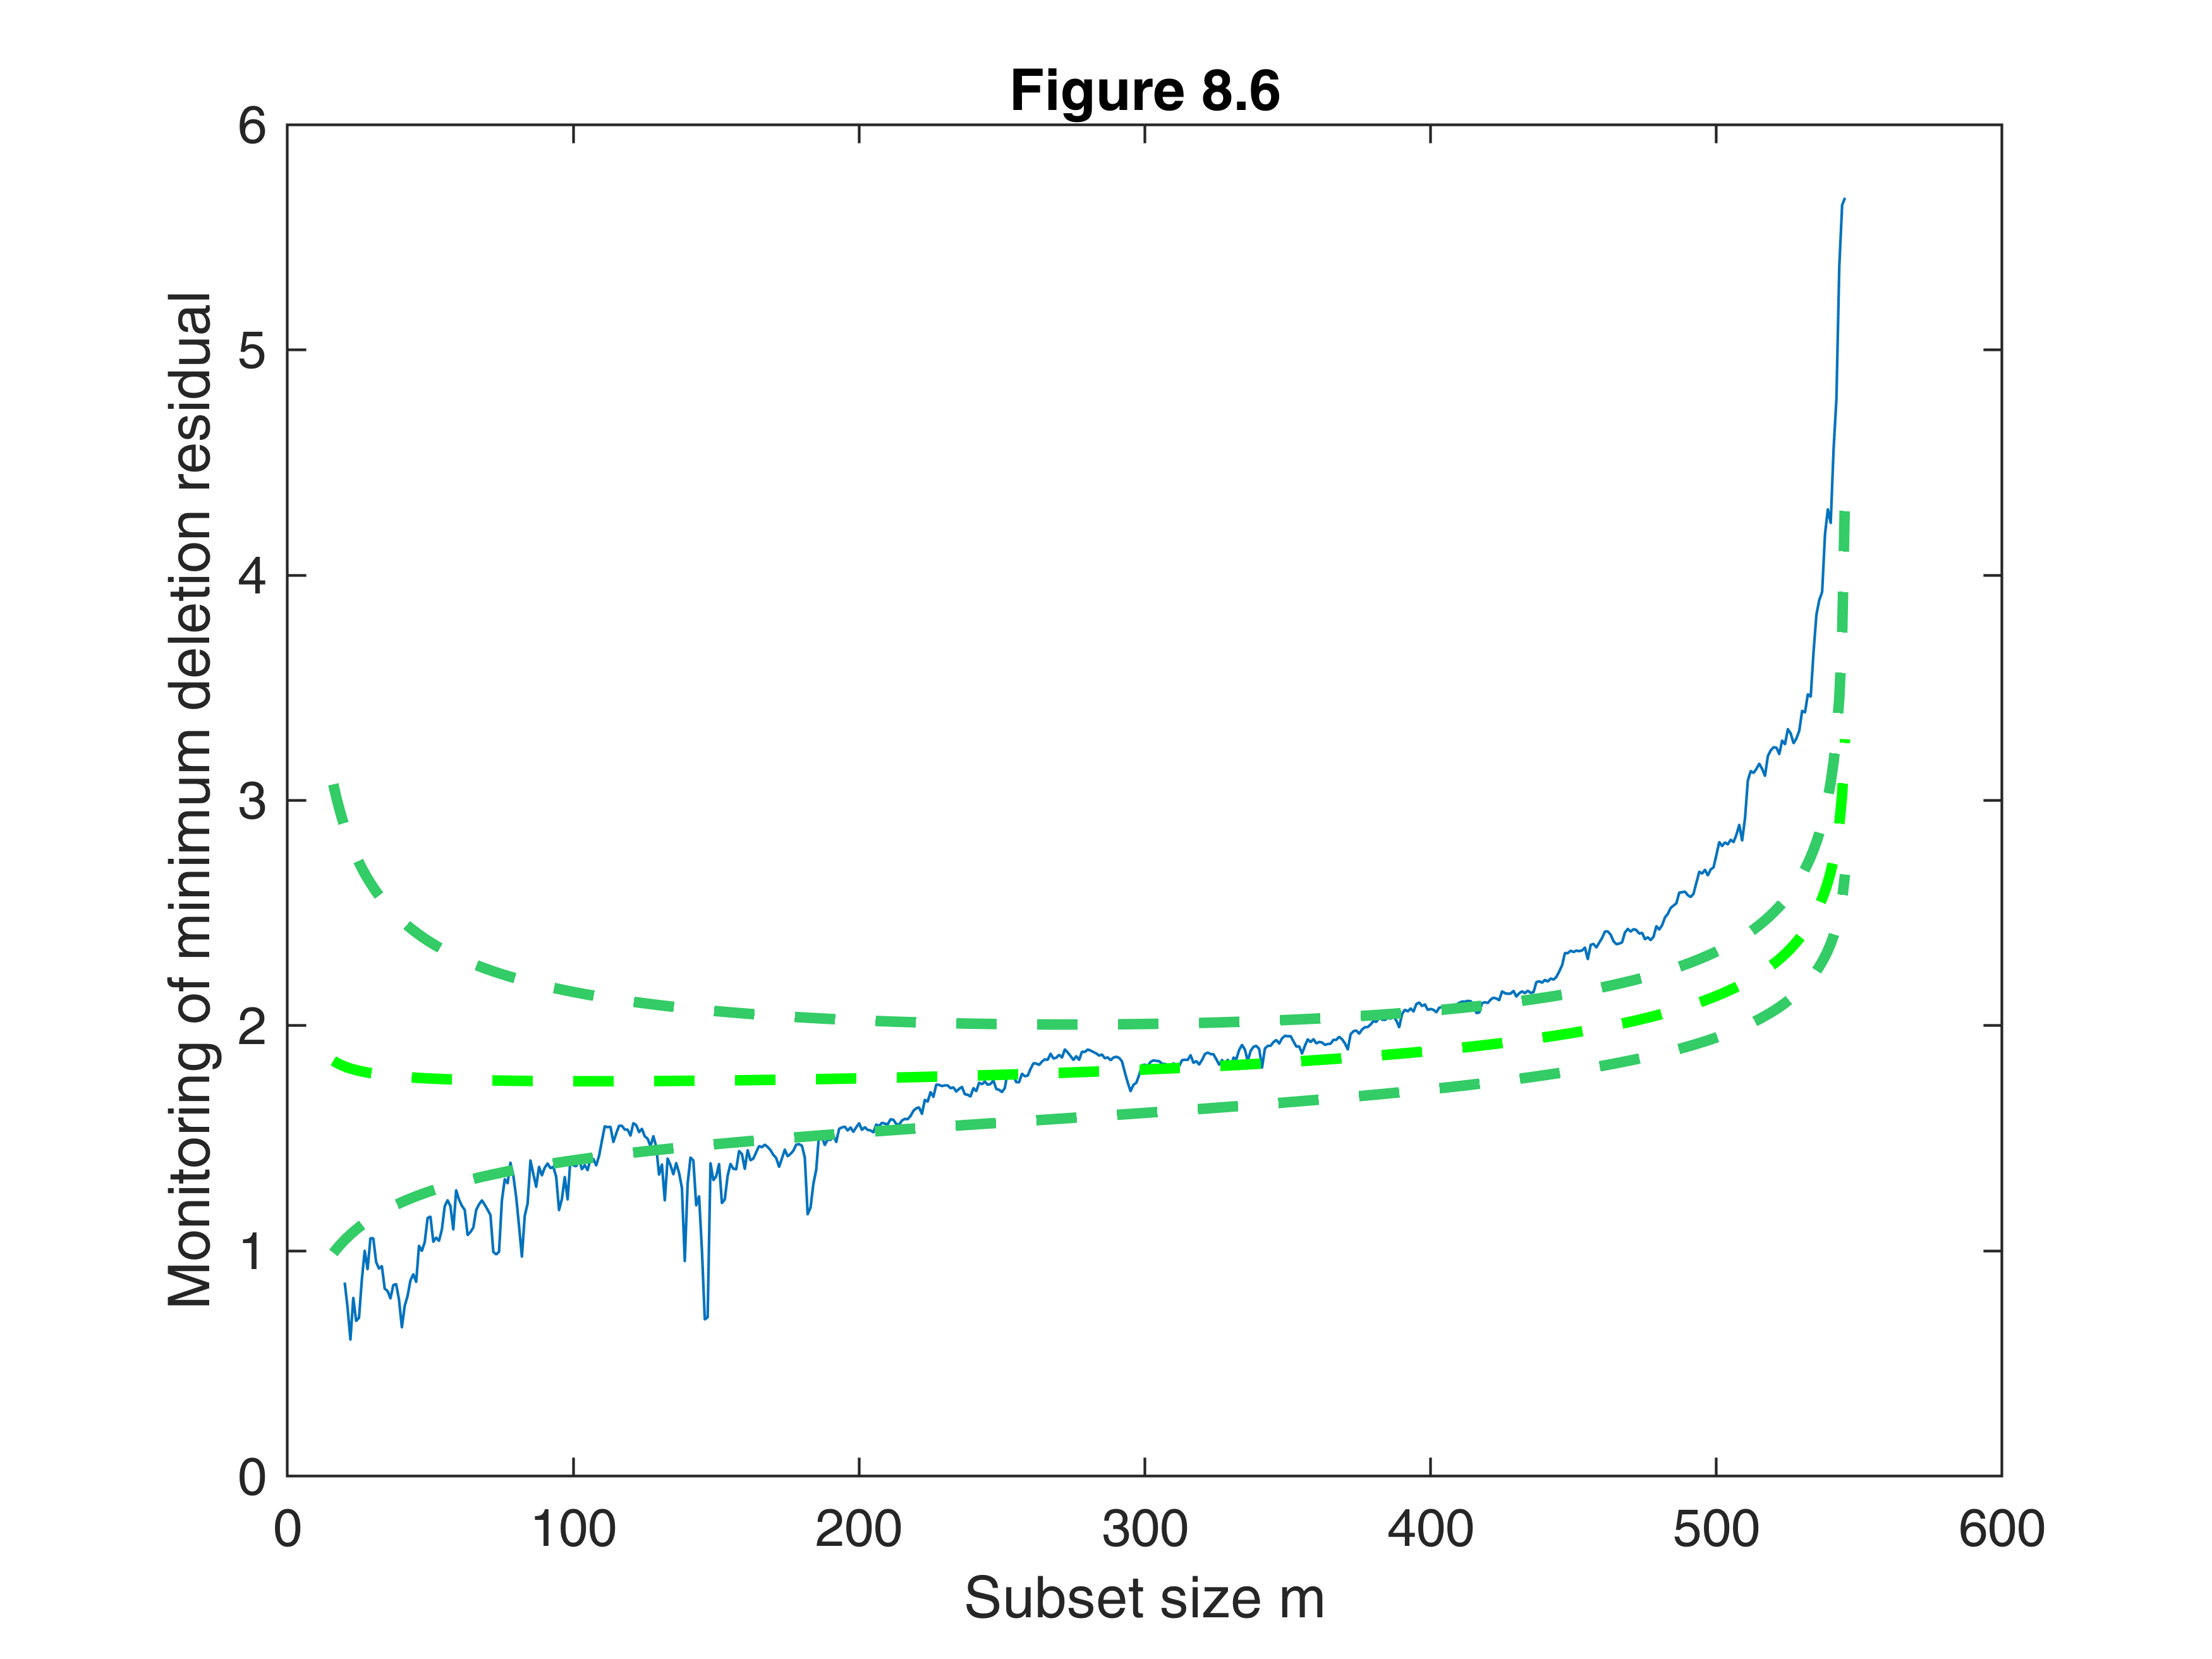

In [15]:
figure
n0=250;

FSRBmdr(y,X,beta0, R, tau0, n0,'init',20,'plots',1);

if prin ==1
    print -depsc h6.eps
else
    set(gcf,'Name', 'Figure 8.6');
    title('Figure 8.6')
end

In [16]:
drawnow

## Create Figure 8.7 (frequentist analysis)


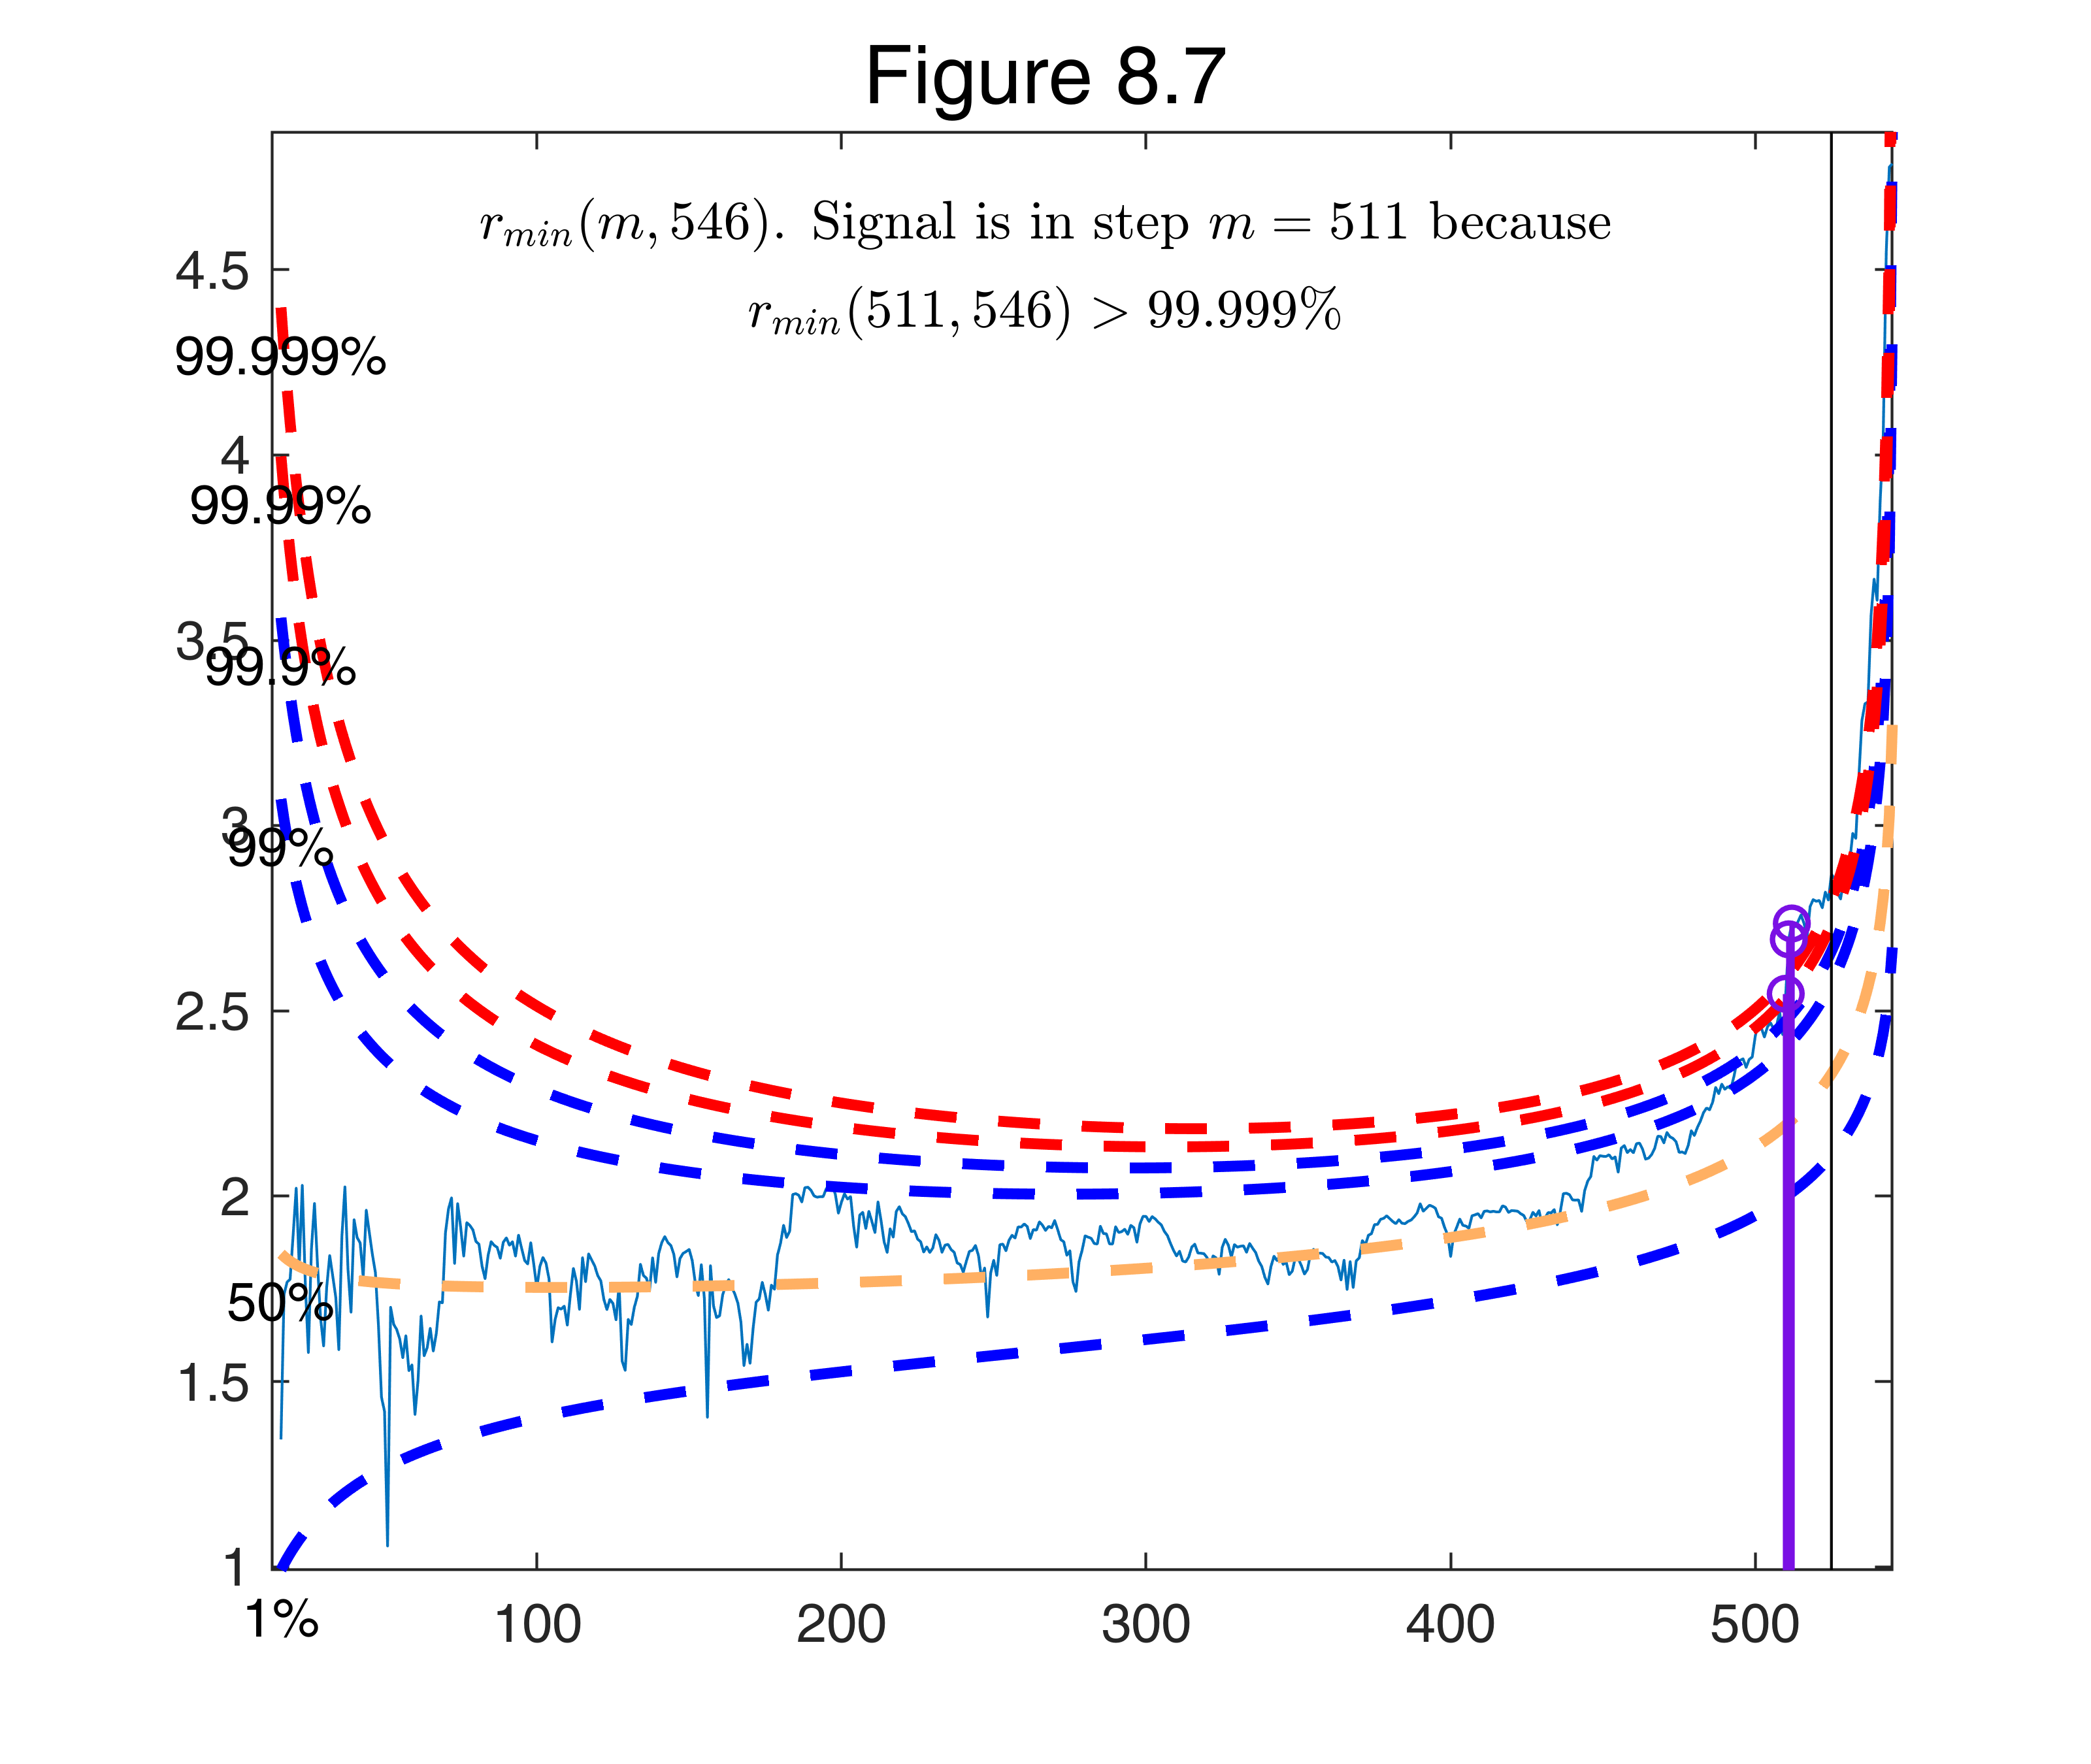

In [17]:
outFSR=FSR(y,X,'plots',1,'msg',0, 'tag','pl_fsrfreq');
dout=n-length(outFSR.ListOut);

fig=findobj(0,'tag','fsr_yXplot');
close(fig)

fig=findobj(0,'tag','pl_fsrfreq');
figure(fig(1))
if prin ==1
    print -depsc  h7.eps
else
    set(gcf,'Name', 'Figure 8.7');
    sgtitle('Figure 8.7')
end

In [18]:
%InsideREADME